## Soil moisture evolution Harz (2015- 2022)

1. Map of the Harz Region 
2. Selections of Grid cells for the precipitation, radiation, tempertature and LAI data
3. Running the simple water balance model for the years 2015 to 2022 for the Harz region
4. Make a soil moisture evolution diagramm

### Importing packages 

In [8]:
import folium
import os
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import shutil
import pandas as pd
import math

### Reading data

### Map of the Harz region and selection of grid cells

In [6]:
file_path = "data/Harz_Aussengrenze/Harz_Aussengrenze.shp"

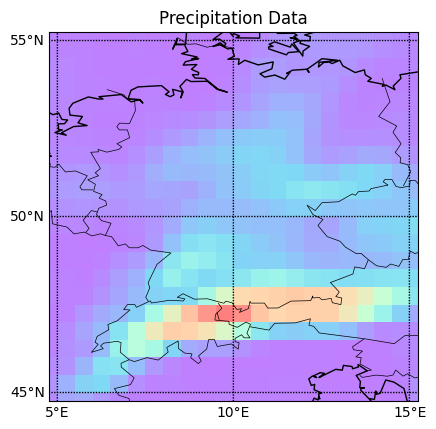

In [16]:
# File paths
precipitation_file = "data/total_precipitation/tp.daily.calc.era5.0d50_CentralEurope.2000.nc"

# Open the NetCDF file
nc_file = nc.Dataset(precipitation_file)
lon = nc_file.variables['lon'][:]
lat = nc_file.variables['lat'][:]
data = nc_file.variables['tp'][50, :, :]  # Using arbitrary time index 50

# Create Basemap instance
m = Basemap(llcrnrlon=lon.min(), llcrnrlat=lat.min(),
            urcrnrlon=lon.max(), urcrnrlat=lat.max(),
            projection='cyl', resolution='l')

# Draw coastlines, countries, and states
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Plot the precipitation data as grid cells
x_mesh, y_mesh = np.meshgrid(lon, lat)
x_mesh, y_mesh = m(x_mesh, y_mesh)
plt.pcolormesh(x_mesh, y_mesh, data, cmap='rainbow', alpha=0.5, label='Precipitation Data')

# Add latitude and longitude lines with labels
m.drawparallels(np.arange(-90., 91., 5.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 5.), labels=[0,0,0,1], fontsize=10)

plt.title('Precipitation Data')

# Show the plot
plt.show()

# Close the NetCDF file
nc_file.close()

In [38]:
import folium
import geopandas as gpd

# File path to the Harz shapefile
shapefile_path = "data/harz/harz.gpkg"

# Load the shapefile using geopandas
schwarzwald_shape = gpd.read_file(shapefile_path, encoding='latin1')

# Create a Folium map
m = folium.Map()

# Add the shapefile to the map
folium.GeoJson(schwarzwald_shape).add_to(m)

# Display the map
m

In [36]:
import geopandas as gpd
from shapely.geometry import box

# File path to the Schwarzwald shapefile
shapefile_path = "data/schwarzwald_naturpark/naturpark_schwarzwald.shp"

# Load the shapefile using geopandas
schwarzwald_shape = gpd.read_file(shapefile_path, encoding='latin1')

# Define the CRS of the shapefile (EPSG:32632)
original_crs = {'init': 'epsg:32632'}

# Convert the bounds to degrees (latitude and longitude)
bounds_deg = schwarzwald_shape.total_bounds
bounds_deg = gpd.GeoSeries([box(bounds_deg[0], bounds_deg[1], bounds_deg[2], bounds_deg[3])], crs=original_crs).to_crs(epsg=4326)[0].bounds

# Print the minimum and maximum longitude and latitude values in degrees
print("Minimum Longitude:", bounds_deg[0])
print("Maximum Longitude:", bounds_deg[2])
print("Minimum Latitude:", bounds_deg[1])
print("Maximum Latitude:", bounds_deg[3])


Minimum Longitude: 7.586294012444659
Maximum Longitude: 8.642403324920886
Minimum Latitude: 47.53134167037791
Maximum Latitude: 48.239953453670786


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



In [37]:
import folium
import geopandas as gpd
from shapely.geometry import box

# File paths
precipitation_file = "data/total_precipitation/tp.daily.calc.era5.0d50_CentralEurope.2000.nc"
shapefile_path = "data/schwarzwald_naturpark/naturpark_schwarzwald.shp"

# Open the NetCDF file
nc_file = nc.Dataset(precipitation_file)
lon = nc_file.variables['lon'][:]
lat = nc_file.variables['lat'][:]
data = nc_file.variables['tp'][50, :, :]  # Using arbitrary time index 50

# Create a Folium map
m = folium.Map()

# Define the CRS of the shapefile (EPSG:32632)
original_crs = {'init': 'epsg:32632'}

# Load the Schwarzwald shapefile using geopandas
schwarzwald_shape = gpd.read_file(shapefile_path, encoding='latin1')

# Convert the bounds to degrees (latitude and longitude)
bounds_deg = schwarzwald_shape.total_bounds
bounds_deg = gpd.GeoSeries([box(bounds_deg[0], bounds_deg[1], bounds_deg[2], bounds_deg[3])], crs=original_crs).to_crs(epsg=4326)[0].bounds

# Add the extent of the Schwarzwald shapefile to the map
folium.Rectangle(bounds=[[bounds_deg[1], bounds_deg[0]], [bounds_deg[3], bounds_deg[2]]],
                 color='blue',
                 fill=True,
                 fill_opacity=0.2,
                 popup='Schwarzwald Extent').add_to(m)

# Close the NetCDF file
nc_file.close()

# Display the map
m


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6

